In [1]:
!pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


In [4]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [8]:
start = "2019-11-13"
end   = "2024-11-13"


In [9]:
btc  = yf.download("BTC-USD", start=start, end=end, progress=False)
eth  = yf.download("ETH-USD", start=start, end=end, progress=False)
usdt = yf.download("USDT-USD", start=start, end=end, progress=False)
bnb  = yf.download("BNB-USD", start=start, end=end, progress=False)


In [10]:
btc  = btc[['Close', 'Volume']].add_suffix(' (BTC)')
eth  = eth[['Close', 'Volume']].add_suffix(' (ETH)')
usdt = usdt[['Close', 'Volume']].add_suffix(' (USDT)')
bnb  = bnb[['Close', 'Volume']].add_suffix(' (BNB)')


In [11]:
data = btc.join([eth, usdt, bnb], how='inner')
data.head()


Price,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Ticker,BTC-USD (BTC),BTC-USD (BTC),ETH-USD (ETH),ETH-USD (ETH),USDT-USD (USDT),USDT-USD (USDT),BNB-USD (BNB),BNB-USD (BNB)
Date,,,,,,,,
2019-11-13,8808.262695,17545755405,188.258743,7343173596,1.003175,20071939197,21.250431,252296146
2019-11-14,8708.094727,19084739975,185.999634,7872664470,1.005582,21911169228,21.264700,237992230
2019-11-15,8491.992188,21796856471,180.521179,8815678477,1.001369,25291395573,20.316225,225530775
2019-11-16,8550.760742,16495389808,183.348358,6789888120,1.006746,18225904912,20.282654,211016746
2019-11-17,8577.975586,18668638897,185.119232,7364325471,1.008471,20418489157,20.260794,224982344


In [17]:
data = btc.join([eth, usdt, bnb], how='inner')
data.tail()

Price,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Ticker,BTC-USD (BTC),BTC-USD (BTC),ETH-USD (ETH),ETH-USD (ETH),USDT-USD (USDT),USDT-USD (USDT),BNB-USD (BNB),BNB-USD (BNB)
Date,,,,,,,,
2024-11-08,76545.476562,55176858003,2962.296631,32303261101,1.000459,102072246665,597.948425,1878681588
2024-11-09,76778.867188,29009480361,3131.144531,29210133088,1.000440,79860693662,624.374695,2739276599
2024-11-10,80474.187500,82570594495,3191.331299,47418730187,1.000693,178936402107,628.302490,2965668641
2024-11-11,88701.484375,117966845037,3374.812988,55417771668,1.001116,221704336713,661.887207,3375111971
2024-11-12,87955.812500,133673285375,3246.257324,56686078066,1.000982,263991047405,627.003845,3603680244


In [15]:
data.shape

(1826, 8)

In [18]:
data.isnull().sum()

Price          Ticker         
Close (BTC)    BTC-USD (BTC)      0
Volume (BTC)   BTC-USD (BTC)      0
Close (ETH)    ETH-USD (ETH)      0
Volume (ETH)   ETH-USD (ETH)      0
Close (USDT)   USDT-USD (USDT)    0
Volume (USDT)  USDT-USD (USDT)    0
Close (BNB)    BNB-USD (BNB)      0
Volume (BNB)   BNB-USD (BNB)      0
dtype: int64

In [19]:
data.describe()

Price,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Ticker,BTC-USD (BTC),BTC-USD (BTC),ETH-USD (ETH),ETH-USD (ETH),USDT-USD (USDT),USDT-USD (USDT),BNB-USD (BNB),BNB-USD (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,33926.502457,3.193093e+10,1891.826084,1.594291e+10,1.000549,5.544242e+10,289.043978,1.364846e+09
std,19092.328115,1.823985e+10,1154.478425,9.891588e+09,0.002360,3.328977e+10,191.724161,1.393234e+09
min,4970.788086,5.331173e+09,110.605873,2.081626e+09,0.974248,9.989859e+09,9.386050,1.365992e+08
25%,18853.627930,2.013978e+10,1190.756165,9.094919e+09,0.999956,3.317071e+10,129.652519,4.314679e+08
50%,30271.130859,2.891344e+10,1834.727905,1.407540e+10,1.000208,4.878418e+10,294.475342,9.599542e+08
75%,47851.326172,3.897214e+10,2706.376953,1.978644e+10,1.000621,6.801913e+10,415.845703,1.819091e+09
max,88701.484375,3.509679e+11,4812.087402,8.448291e+10,1.053585,2.790675e+11,710.464050,1.798295e+10


#EXPLORATORY DATA ANALYSIS

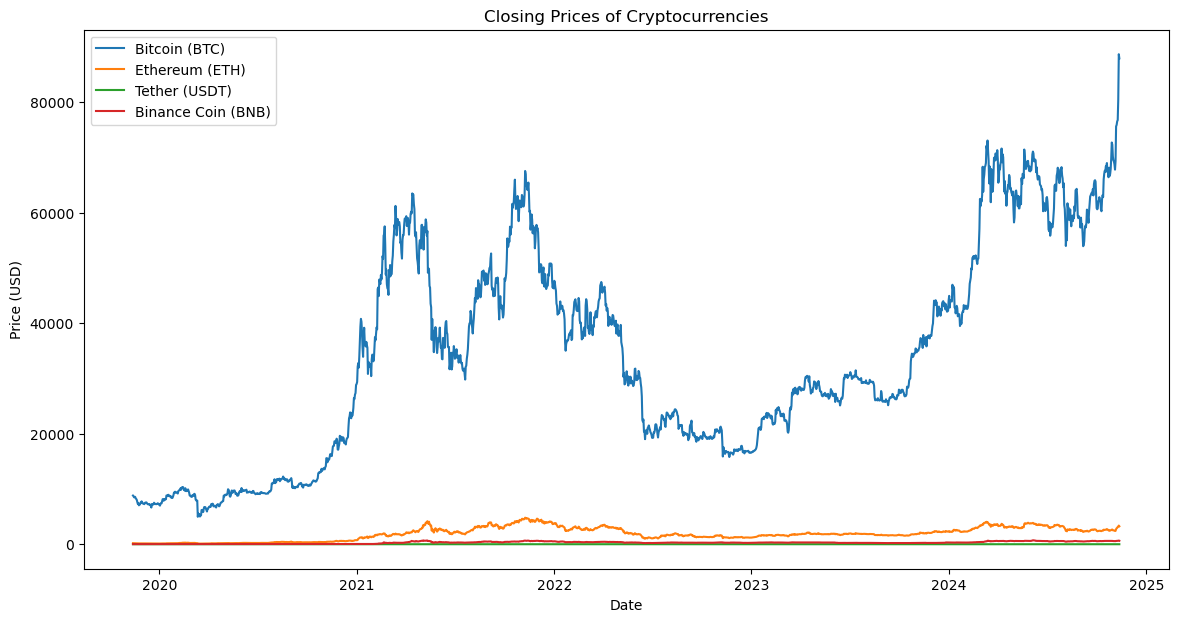

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [34]:
data.index.name


'Date'

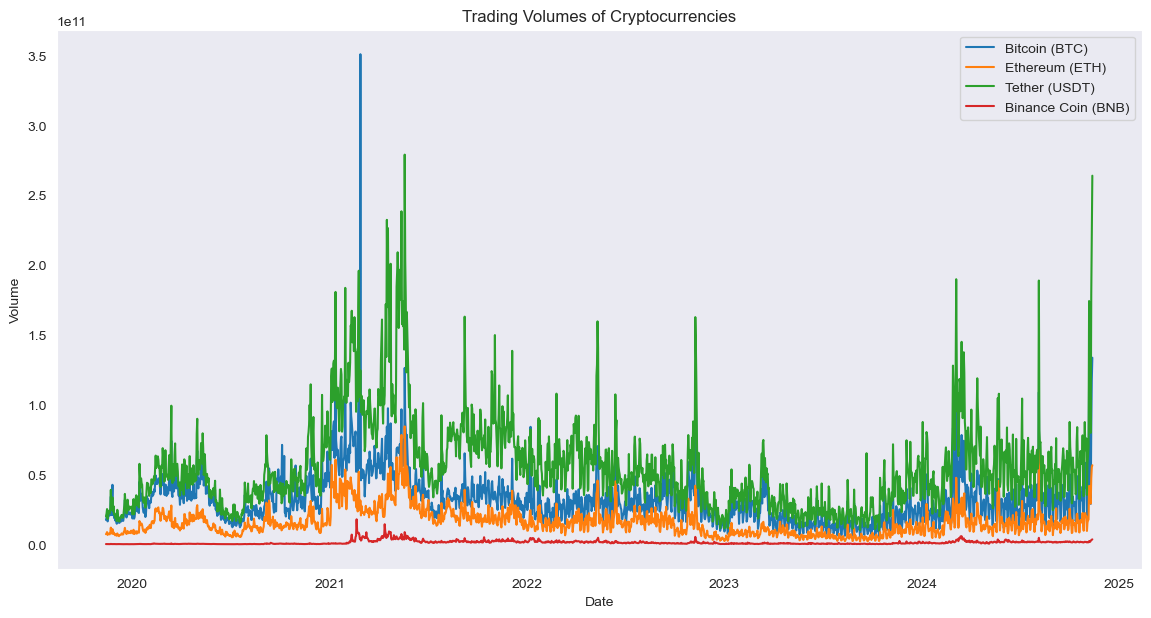

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


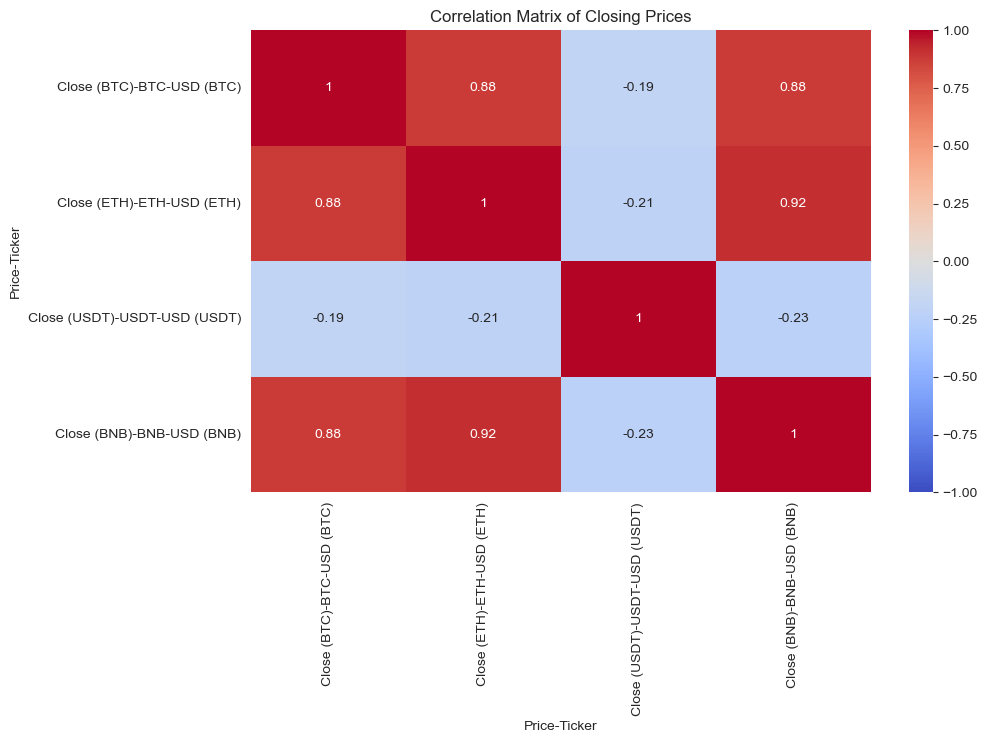

In [28]:
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


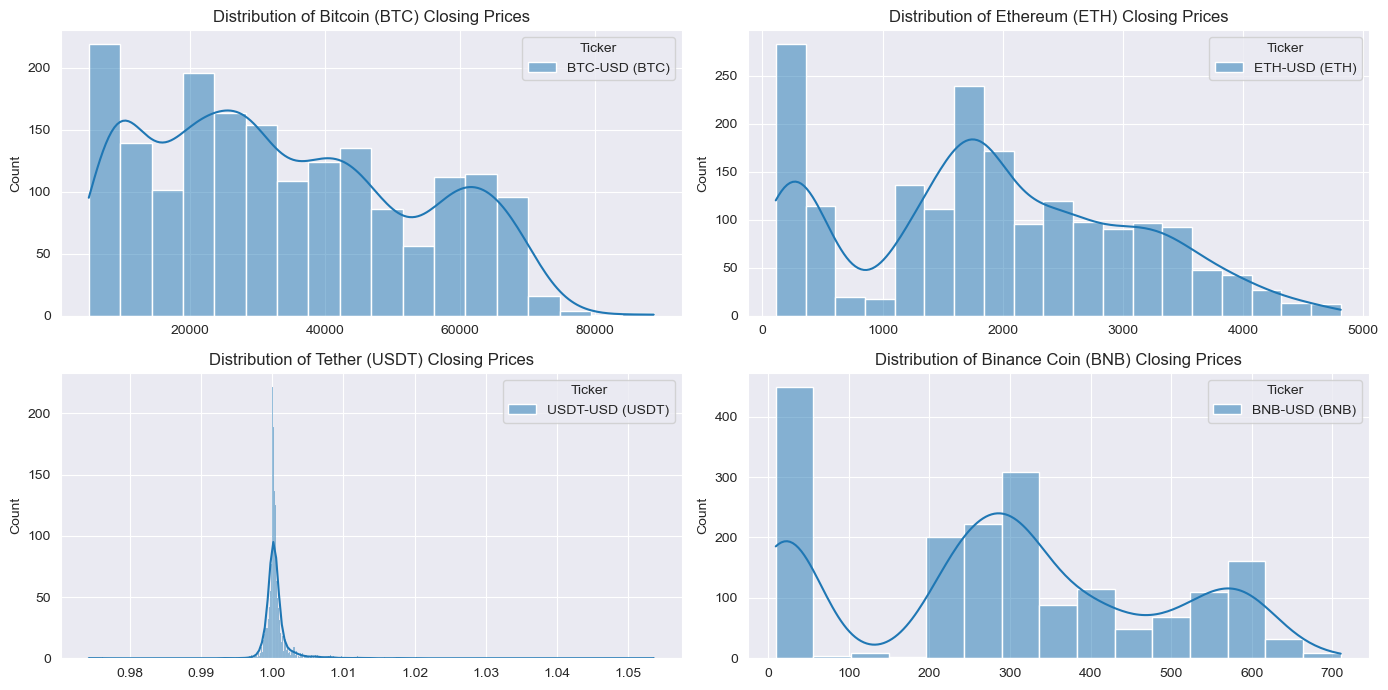

In [46]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': "('Close (BTC)', 'BTC-USD (BTC)')"}>,
        <Axes: title={'center': "('Volume (BTC)', 'BTC-USD (BTC)')"}>,
        <Axes: title={'center': "('Close (ETH)', 'ETH-USD (ETH)')"}>,
        <Axes: title={'center': "('Volume (ETH)', 'ETH-USD (ETH)')"}>],
       [<Axes: title={'center': "('Close (USDT)', 'USDT-USD (USDT)')"}>,
        <Axes: title={'center': "('Volume (USDT)', 'USDT-USD (USDT)')"}>,
        <Axes: title={'center': "('Close (BNB)', 'BNB-USD (BNB)')"}>,
        <Axes: title={'center': "('Volume (BNB)', 'BNB-USD (BNB)')"}>]],
      dtype=object)

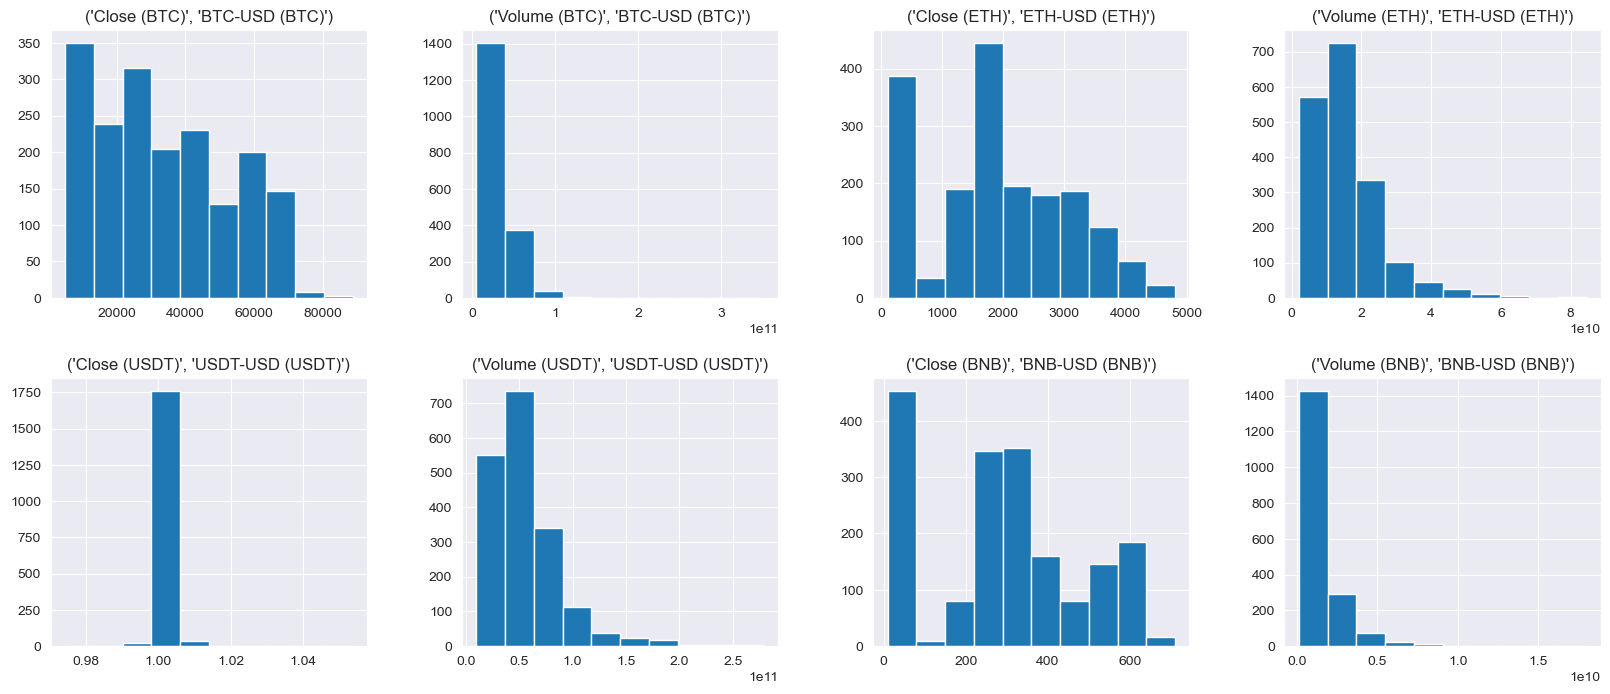

In [47]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

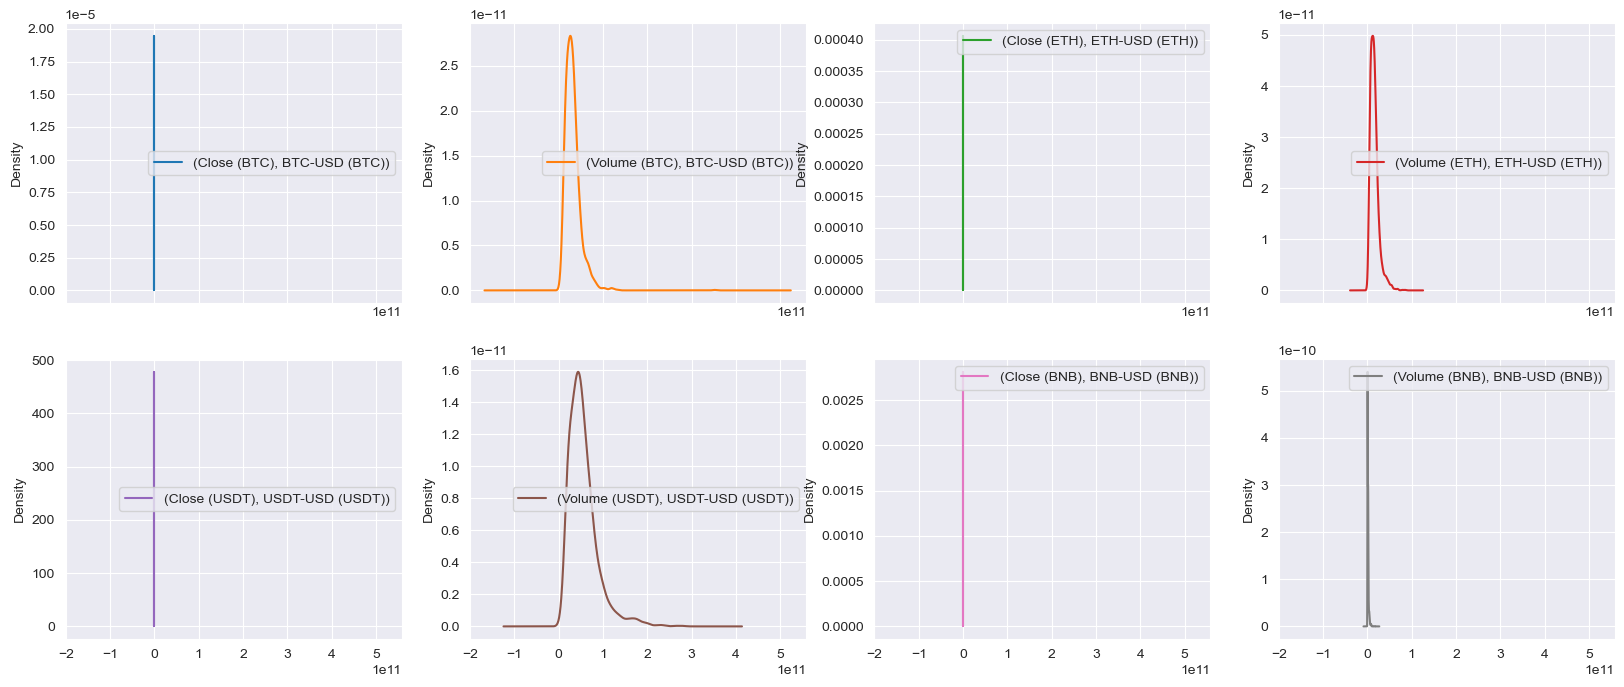

In [48]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

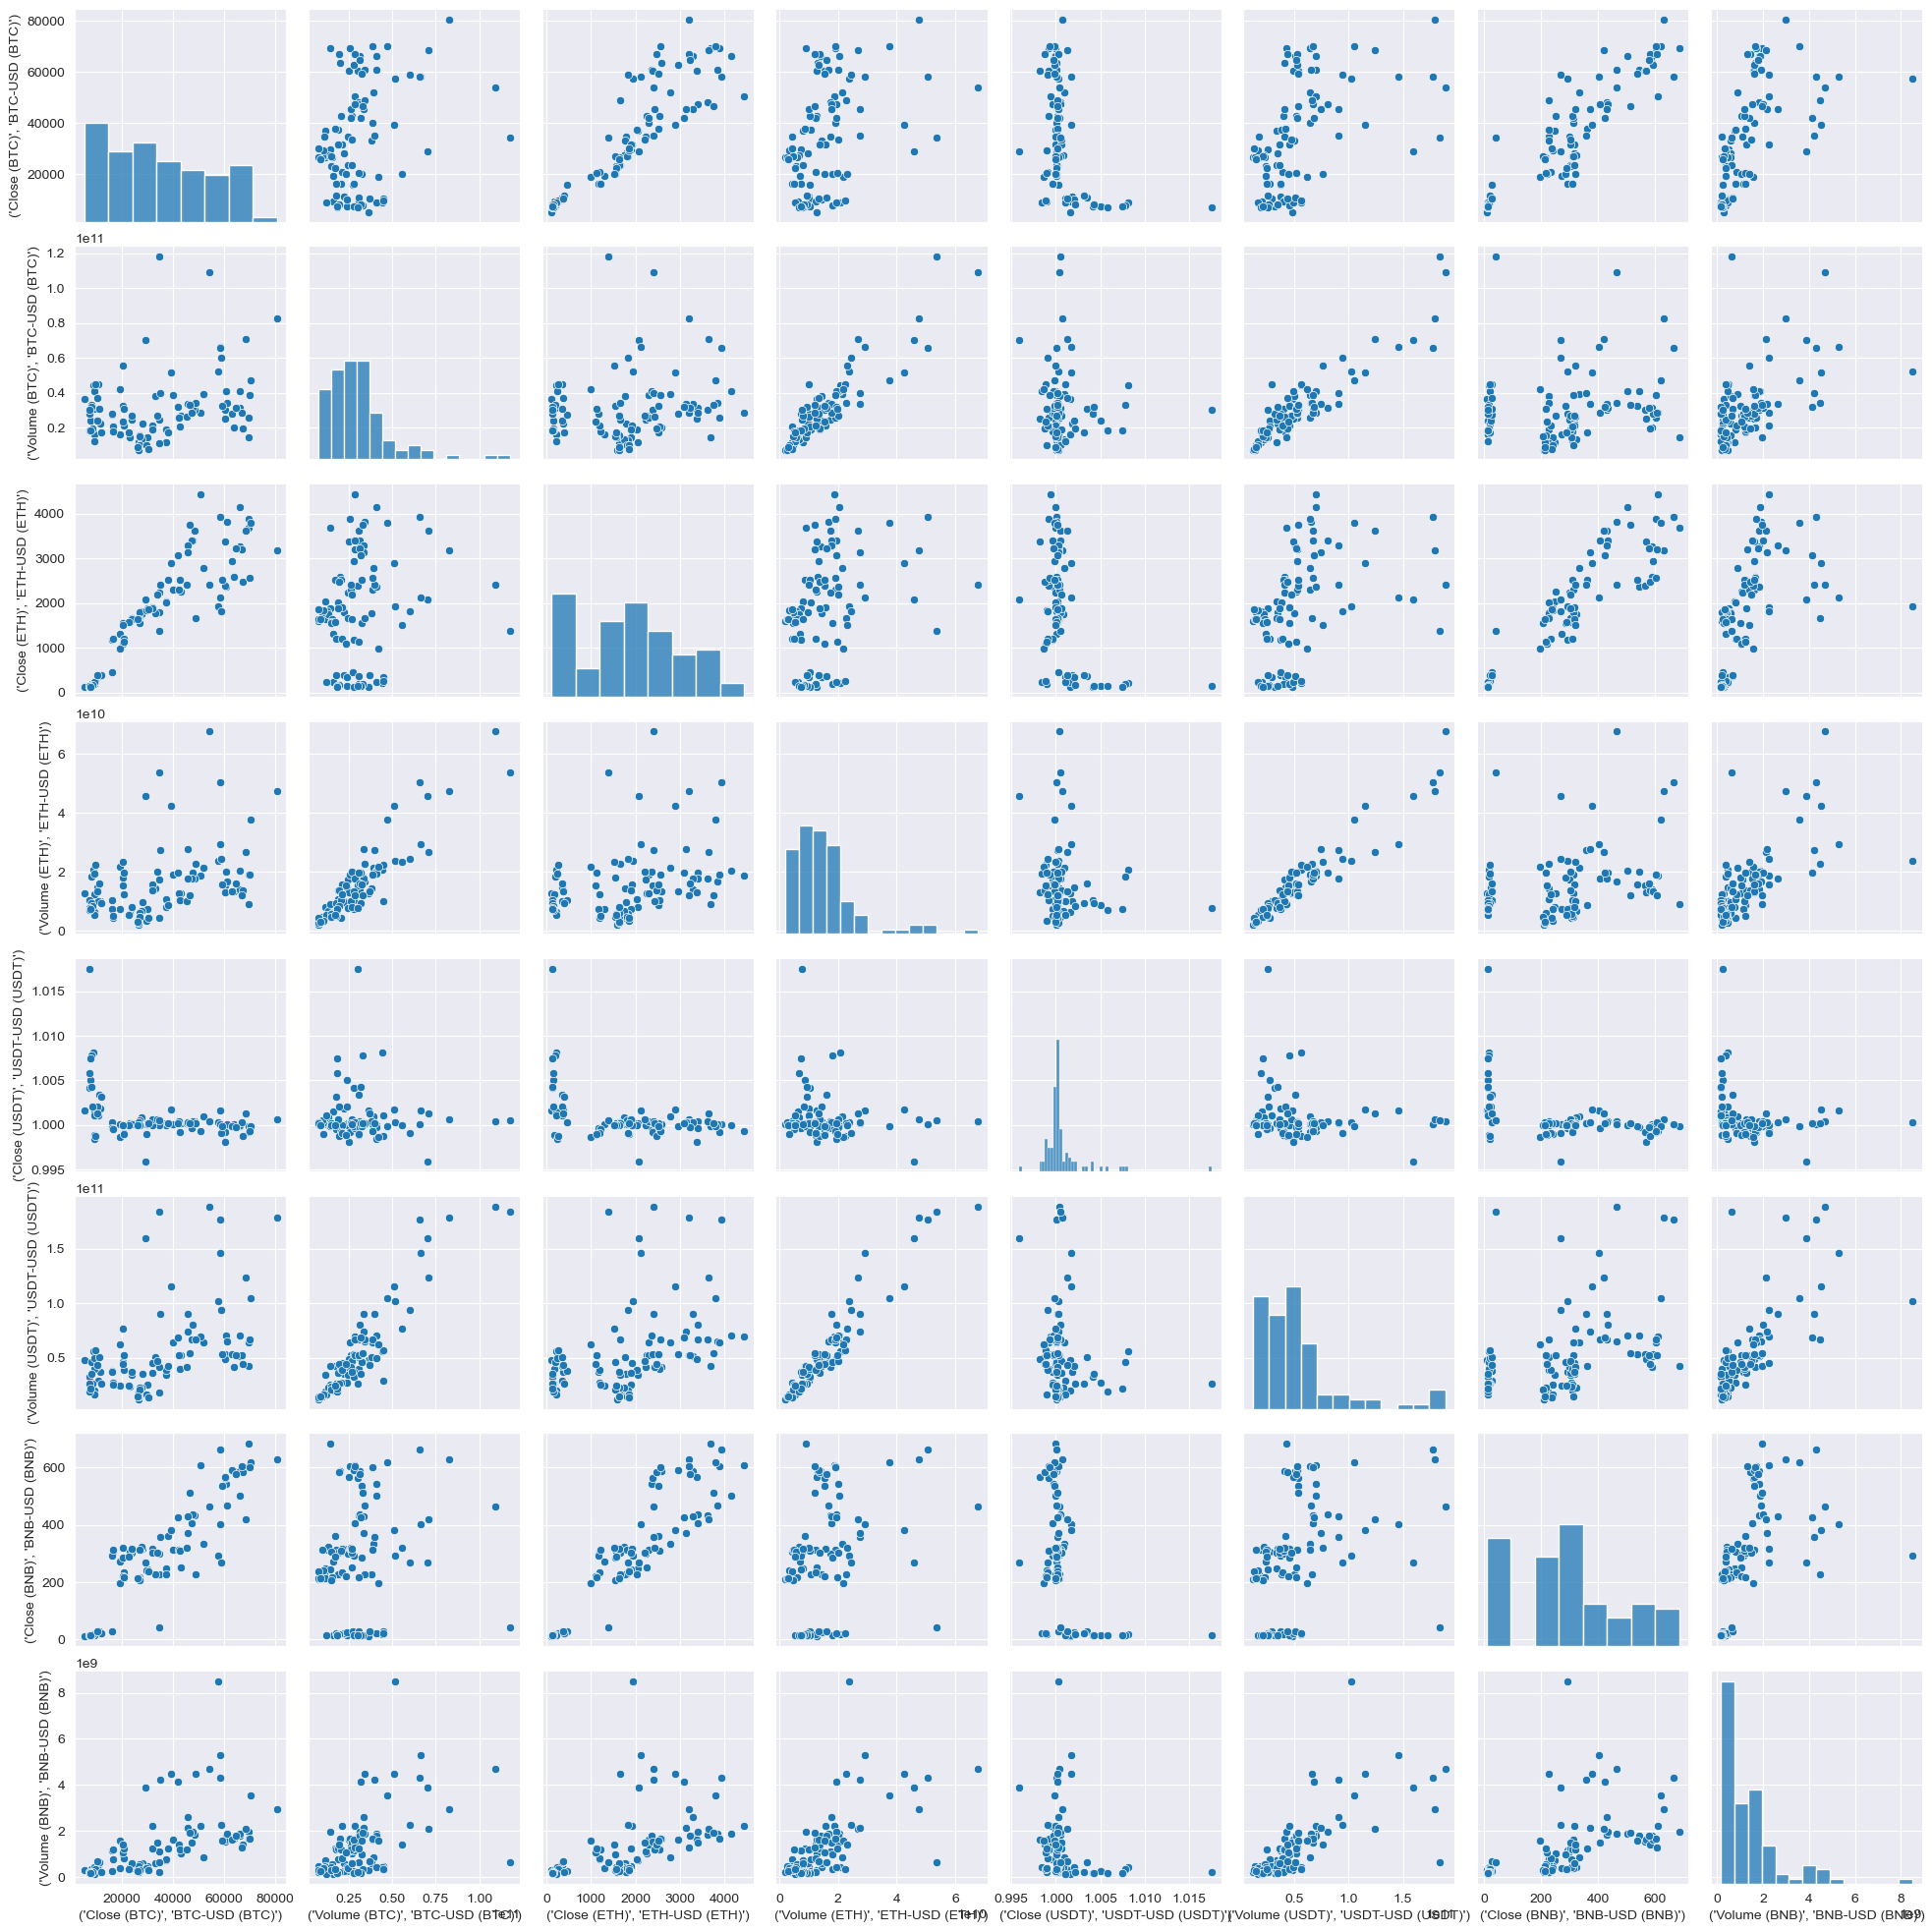

In [49]:
sns.pairplot(data.sample(n=100));

#data preprocessing

In [50]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

C:\Users\Twinkele\AppData\Local\Temp\ipykernel_19808\3589913439.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data.drop(columns = ['Close (BTC)'], axis = 1)


In [51]:
X.head()

Price,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Ticker,BTC-USD (BTC),ETH-USD (ETH),ETH-USD (ETH),USDT-USD (USDT),USDT-USD (USDT),BNB-USD (BNB),BNB-USD (BNB)
Date,,,,,,,
2019-11-13,17545755405,188.258743,7343173596,1.003175,20071939197,21.250431,252296146
2019-11-14,19084739975,185.999634,7872664470,1.005582,21911169228,21.264700,237992230
2019-11-15,21796856471,180.521179,8815678477,1.001369,25291395573,20.316225,225530775
2019-11-16,16495389808,183.348358,6789888120,1.006746,18225904912,20.282654,211016746
2019-11-17,18668638897,185.119232,7364325471,1.008471,20418489157,20.260794,224982344


In [52]:
X.tail()

Price,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Ticker,BTC-USD (BTC),ETH-USD (ETH),ETH-USD (ETH),USDT-USD (USDT),USDT-USD (USDT),BNB-USD (BNB),BNB-USD (BNB)
Date,,,,,,,
2024-11-08,55176858003,2962.296631,32303261101,1.000459,102072246665,597.948425,1878681588
2024-11-09,29009480361,3131.144531,29210133088,1.000440,79860693662,624.374695,2739276599
2024-11-10,82570594495,3191.331299,47418730187,1.000693,178936402107,628.302490,2965668641
2024-11-11,117966845037,3374.812988,55417771668,1.001116,221704336713,661.887207,3375111971
2024-11-12,133673285375,3246.257324,56686078066,1.000982,263991047405,627.003845,3603680244


In [53]:
Y.head()

Ticker,BTC-USD (BTC)
Date,
2019-11-13,8808.262695
2019-11-14,8708.094727
2019-11-15,8491.992188
2019-11-16,8550.760742
2019-11-17,8577.975586


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [55]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461, 1)
y_test shape: (366, 1)


In [56]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

c:\Users\Twinkele\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Twinkele\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [57]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features)

Selected Features: MultiIndex([( 'Close (USDT)', 'USDT-USD (USDT)'),
            ('Volume (USDT)', 'USDT-USD (USDT)'),
            (  'Close (BNB)',   'BNB-USD (BNB)'),
            ( 'Volume (BNB)',   'BNB-USD (BNB)')],
           names=['Price', 'Ticker'])


In [58]:
X_train

array([[1.00317001e+00, 2.61138960e+10, 2.24755363e+01, 2.16694610e+08],
       [1.00403094e+00, 2.20699895e+10, 1.51852541e+01, 1.52435707e+08],
       [1.00029695e+00, 4.57905275e+10, 2.64782379e+02, 1.81945449e+09],
       ...,
       [9.99579012e-01, 1.07880114e+11, 5.98670837e+02, 2.63156657e+09],
       [1.00114906e+00, 1.33337900e+11, 3.44113983e+02, 5.65667734e+09],
       [1.00051296e+00, 7.00881863e+10, 3.36191223e+02, 1.50705691e+09]])

In [59]:
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 65925433.92509889
R-squared: 0.8174438839490583

----- Ridge Regression -----
Mean Squared Error (MSE): 66108513.694632195
R-squared: 0.8169369122135144

----- Lasso Regression -----
Mean Squared Error (MSE): 65889228.96351196
R-squared: 0.8175441402048851

----- ElasticNet Regression -----
Mean Squared Error (MSE): 288670157.86500996
R-squared: 0.20063472165353136

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 362817768.9077893
R-squared: -0.004689674114644271

----- Decision Tree Regression -----
Mean Squared Error (MSE): 44476566.09343306
R-squared: 0.8768385935764175



c:\Users\Twinkele\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Twinkele\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


----- Random Forest Regression -----
Mean Squared Error (MSE): 23184716.067067802
R-squared: 0.9357985004428409



c:\Users\Twinkele\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 31985326.484192576
R-squared: 0.9114284635546028

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 34759144.16462348
R-squared: 0.9037474009931001



c:\Users\Twinkele\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 177558669.69635049
R-squared: 0.5083169092559121

                             Model           MSE  R-squared
0                Linear Regression  6.592543e+07   0.817444
1                 Ridge Regression  6.610851e+07   0.816937
2                 Lasso Regression  6.588923e+07   0.817544
3            ElasticNet Regression  2.886702e+08   0.200635
4  Support Vector Regression (SVR)  3.628178e+08  -0.004690
5         Decision Tree Regression  4.447657e+07   0.876839
6         Random Forest Regression  2.318472e+07   0.935799
7     Gradient Boosting Regression  3.198533e+07   0.911428
8   K-Nearest Neighbors Regression  3.475914e+07   0.903747
9  Neural Network Regression (MLP)  1.775587e+08   0.508317


c:\Users\Twinkele\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


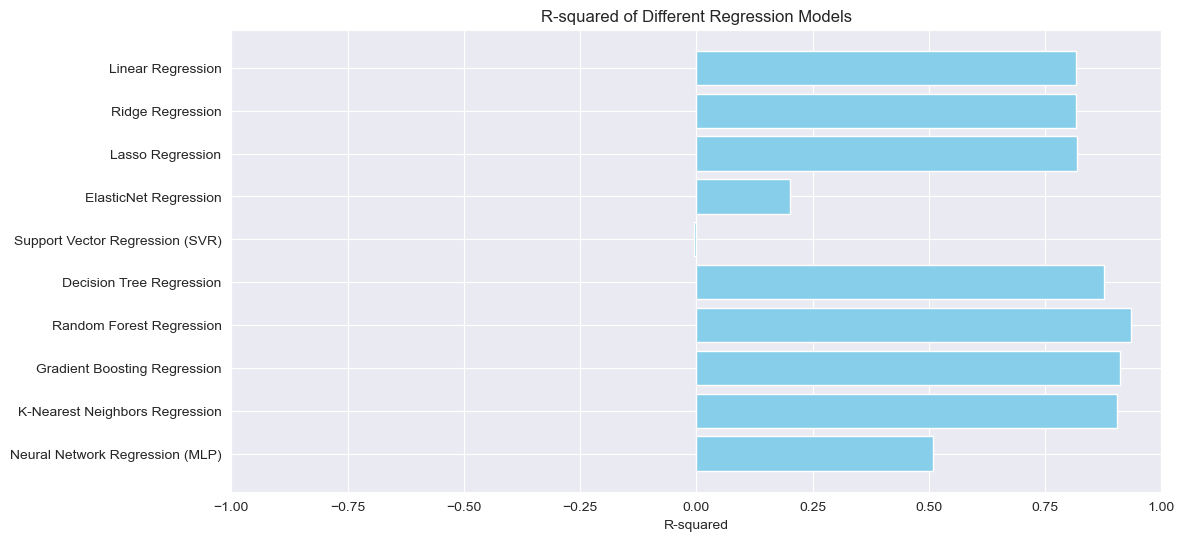

In [62]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()

#saving the model

In [63]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


c:\Users\Twinkele\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Loaded Random Forest Regression - Mean Squared Error (MSE): 23498448.317336902
Loaded Random Forest Regression - R-squared: 0.9349297349652541
